In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## it was satcking logistic random forest and xg boost together

In [2]:
train=pd.read_csv("univ ai training.csv")

In [3]:
train1=train.drop('risk_flag',axis=1)

In [4]:
train1.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


## data is clean

In [5]:
#categorical fea
train1.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64

## do the one cot encoding on categorical features 

In [7]:
list1=[]
for i in (train1.dtypes=="object"):
    list1.append(i)
train1.drop(['state',"city","profession"], axis=1,inplace=True)    

In [15]:
list1

train1["id"]=train1["Id"]
train1.drop("Id",axis=1,inplace=True)


In [16]:
train1=pd.get_dummies(train1)

In [17]:
train1.columns


Index(['income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'married_married', 'married_single',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'car_ownership_no', 'car_ownership_yes',
       'id'],
      dtype='object')

In [19]:
train1.head()
import matplotlib.pyplot as plt

## standardize the income

In [20]:
plt.show()
train1["income"].mean()
train1["income"]=train1["income"]/(train1["income"].mean())
train1.head(3)

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,id
0,0.260917,23,3,3,13,0,1,0,0,1,1,0,1
1,1.515777,40,10,9,13,0,1,0,0,1,1,0,2
2,0.798824,66,4,4,10,1,0,0,0,1,1,0,3


In [21]:
train1.head()

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,id
0,0.260917,23,3,3,13,0,1,0,0,1,1,0,1
1,1.515777,40,10,9,13,0,1,0,0,1,1,0,2
2,0.798824,66,4,4,10,1,0,0,0,1,1,0,3
3,1.252012,41,2,2,12,0,1,0,0,1,0,1,4
4,1.154440,47,11,3,14,0,1,0,0,1,1,0,5


## smote for imbalanced dataset

In [23]:
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE

In [24]:
X=train1

In [25]:
train1.columns

Index(['income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'married_married', 'married_single',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'car_ownership_no', 'car_ownership_yes',
       'id'],
      dtype='object')

In [26]:
train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [27]:
y=train["risk_flag"]

In [30]:
x_sm, y_sm = SMOTE(random_state=1).fit_resample(X, y)
model_lr_smote = LogisticRegression(penalty="l2",
                                    C=0.5,
                                    fit_intercept=True,
                                    random_state=0,
                                    max_iter=10000,
                                    solver='lbfgs')
model_lr_smote.fit(x_sm, y_sm)

LogisticRegression(C=0.5, max_iter=10000, random_state=0)

In [33]:
 from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
model_lr_base = LogisticRegression(penalty="l2",
                                   C=0.5,
                                   fit_intercept=True,
                                   random_state=0,
                                   max_iter=10000,
                                   solver='lbfgs')
model_lr_base.fit(X, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
                                                    

In [44]:
y_pred_lr = model_lr_base.predict(x_test)
print("Accuracy: %.2f%%" % (model_lr_base.score(x_test, y_test) * 100))
print(confusion_matrix(y_test, y_pred_lr))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

# predict probabilities
prob = model_lr_base.predict_proba(x_test)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_lr, recall_lr, threshold = precision_recall_curve(y_test, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_lr, precision_lr))

Accuracy: 87.75%
[[66338     0]
 [ 9262     0]]
PR-AUC:  0.1424495057735916


In [32]:
test=pd.read_csv("univ ai test data.csv")

In [47]:
y_pred_lr = model_lr_smote.predict(x_test)
print("Accuracy: %.2f%%" % (model_lr_smote.score(x_test, y_test) * 100))
print(confusion_matrix(y_test, y_pred_lr))


# predict probabilities
prob = model_lr_smote.predict_proba(x_test)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_lr, recall_lr, threshold = precision_recall_curve(y_test, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_lr, precision_lr))

Accuracy: 12.25%
[[    0 66338]
 [    0  9262]]
PR-AUC:  0.14913149074742843


In [51]:
rf = RandomForestClassifier(n_estimators=20,
                                    min_samples_leaf=30,
                                    oob_score=True,
                                    random_state=100,
                                    class_weight='balanced',
                                    n_jobs=-1)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', min_samples_leaf=30,
                       n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=100)

In [54]:
from sklearn.ensemble import RandomForestClassifier
model_rf_base = RandomForestClassifier(n_estimators=50,
                                        min_samples_leaf=30,
                                        oob_score=True,
                                        random_state=100,
                                        n_jobs=-1)
model_rf_base.fit(x_train, y_train.values.ravel())

RandomForestClassifier(min_samples_leaf=30, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=100)

## stacking classifier


In [ ]:
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [56]:
y_pred = model_rf_base.predict(x_test)
print("Accuracy: %.2f%%" % (model_rf_base.score(x_test, y_test) * 100))
print(confusion_matrix(y_test, y_pred))


# predict probabilities
prob = model_rf_base.predict_proba(x_test)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_rf, recall_rf, threshold = precision_recall_curve(y_test, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_rf, precision_rf))

Accuracy: 87.80%
[[66330     8]
 [ 9214    48]]
PR-AUC:  0.5381805383130661


In [58]:
x_train_rf_sm, y_train_sm = SMOTE(random_state=1).fit_resample(x_train, y_train.values.ravel())
model_rf_smote = RandomForestClassifier(n_estimators=500,
                                        min_samples_leaf=30,
                                        oob_score=True,
                                        random_state=100,
                                        n_jobs=-1)
model_rf_smote.fit(x_train_rf_sm, y_train_sm)

RandomForestClassifier(min_samples_leaf=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=100)

In [61]:
y_pred_rf = model_rf_smote.predict(x_test)
print("Accuracy: %.2f%%" % (model_rf_smote.score(x_test, y_test) * 100))
print(confusion_matrix(y_test, y_pred_rf))


prob = model_rf_smote.predict_proba(x_test)
preds = prob[:,1]
precision_rf, recall_rf, threshold = precision_recall_curve(y_test, preds)
print('PR-AUC: ', auc(recall_rf, precision_rf))

Accuracy: 81.94%
[[58738  7600]
 [ 6057  3205]]
PR-AUC:  0.2929750270607697


In [64]:
scaler = StandardScaler()
scaler.fit(x_train.astype('float64'))
StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_nn = scaler.transform(x_train.astype('float64'))
x_test_nn = scaler.transform(x_test.astype('float64'))

In [67]:
from sklearn.preprocessing import StandardScaler
X.shape

(252000, 13)

In [72]:
model_xgb = XGBClassifier(max_depth=3,
                          learning_rate=0.05,
                          n_estimators=300,
                          objective='binary:logistic',
                          subsample=0.8,
                          random_state=42)
eval_set = [(x_train, y_train.values.ravel()), (x_test, y_test.values.ravel())]
eval_metric = ['auc', 'error']
model_xgb.fit(x_train, y_train.values.ravel(), eval_metric=eval_metric, eval_set=eval_set, 
              verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
from xgboost import XGBClassifier

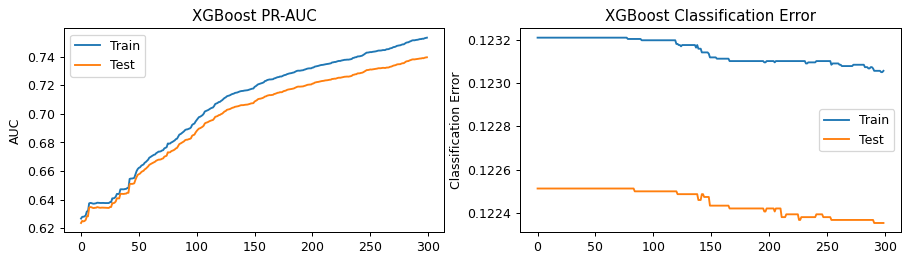

In [75]:
results = model_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=90)
ax1.plot(x_axis, results['validation_0']['auc'], label='Train')
ax1.plot(x_axis, results['validation_1']['auc'], label='Test')
ax1.legend()
ax1.set_ylabel('AUC')
ax1.set_title('XGBoost PR-AUC')

ax2.plot(x_axis, results['validation_0']['error'], label='Train')
ax2.plot(x_axis, results['validation_1']['error'], label='Test')
ax2.legend()
ax2.set_ylabel('Classification Error')
ax2.set_title('XGBoost Classification Error')
plt.show()


plt.show()

In [78]:
model_xgb_base = XGBClassifier(max_depth=3, 
                                   learning_rate=0.05, 
                                   n_estimators=300, 
                                   objective='binary:logistic', 
                                   subsample=0.8, 
                                   random_state=42)
model_xgb_base.fit(x_train, y_train.values.ravel())

[00:13:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
y_pred_xgb = model_xgb_base.predict(x_test)
print("Accuracy: %.2f%%" % (model_xgb_base.score(x_test, y_test) * 100))
print(confusion_matrix(y_test, y_pred_xgb))

# predict probabilities
prob = model_xgb_base.predict_proba(x_test)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_xgb, recall_xgb, threshold = precision_recall_curve(y_test, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_xgb, precision_xgb))

Accuracy: 87.76%
[[66333     5]
 [ 9245    17]]
PR-AUC:  0.2603512209759907


In [83]:
output_rf = model_rf_base.predict_proba(x_test)
output_rf2 = model_rf_base.predict(x_test)



# XGBoost Model
output_xgb = model_xgb.predict_proba(x_test)
output_xgb2 = model_xgb.predict(x_test)

# Ensemble output
# Avg
output = (output_rf + output_xgb) / 2

# Majority vote
output2 = pd.DataFrame({'rf': output_rf2, 'xgb': output_xgb2})
output2['Prediction'] = output2.sum(axis=1)
output2.loc[output2['Prediction'] < 2, 'Prediction'] = 0
output2.loc[output2['Prediction'] >= 2, 'Prediction'] = 1

In [87]:
y_pred_stacking_rf = model_rf_base.predict(x_train)

y_pred_stacking_xgb = model_xgb.predict(x_train)
x_train_stacking = pd.DataFrame({'rf': y_pred_stacking_rf,  'xgb': y_pred_stacking_xgb})
y_train_stacking = pd.DataFrame(y_train.copy())
x_test_stacking = pd.DataFrame({'rf': output_rf2,  'xgb': output_xgb2})
y_test_stacking = pd.DataFrame(y_test.copy())

# Fit the Meta Learner from first level predictions
neg_weight = y_train_stacking['risk_flag'].value_counts(dropna=False)[0] / y_train_stacking['risk_flag'].value_counts(dropna=False)[1]
model_stacking_xgb = XGBClassifier(max_depth=3, 
                                   learning_rate=0.05, 
                                   n_estimators=300, 
                                   objective='binary:logistic', 
                                   subsample=0.8, 
                                   scale_pos_weight=neg_weight, 
                                   random_state=42)
model_stacking_xgb.fit(x_train_stacking, y_train_stacking.values.ravel())

model_stacking_lr = LogisticRegression(penalty="l2", C=0.5, fit_intercept=True, class_weight='balanced',
                                       random_state=0, max_iter=10000, solver='lbfgs')
model_stacking_lr.fit(x_train_stacking, y_train_stacking.values.ravel())


[00:19:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression(C=0.5, class_weight='balanced', max_iter=10000,
                   random_state=0)

In [92]:
p_output = pd.DataFrame(output.copy())
p_output.columns = ['Fully Paid', 'Default']
p_output['Prediction'] = p_output.idxmax(axis=1)
p_output['Fully Paid'] = p_output['Fully Paid'].multiply(100).round(0).astype(int).astype(str) + '%'
p_output['Default'] = p_output['Default'].multiply(100).round(0).astype(int).astype(str) + '%'

y_test2 = pd.DataFrame(y_test.copy())
y_test2.columns = ['Prediction']
y_test2['Prediction'].replace(0, 'Fully Paid', inplace=True)
y_test2['Prediction'].replace(1, 'Default', inplace=True)
print('Averaging Method')
accuracy = accuracy_score(y_true=y_test2, y_pred=p_output['Prediction'])
print("Accuracy: %.2f%%" % (accuracy * 100))

# Majority
output2['Prediction'].replace(0, 'Fully Paid', inplace=True)
output2['Prediction'].replace(1, 'Default', inplace=True)

print('\nMajority Method')
accuracy = accuracy_score(y_true=y_test2, y_pred=output2['Prediction'])
print("Accuracy: %.2f%%" % (accuracy * 100))
print(confusion_matrix(y_test2, output2['Prediction']))


Averaging Method
Accuracy: 87.76%

Majority Method
Accuracy: 87.75%
[[    0  9262]
 [    0 66338]]


In [89]:
from sklearn.metrics import accuracy_score

In [94]:
y_pred_xgb = model_stacking_xgb.predict(x_test_stacking)
print("Accuracy: %.2f%%" % (model_stacking_xgb.score(x_test_stacking, y_test_stacking) * 100))
print(confusion_matrix(y_test_stacking, y_pred_xgb))

# predict probabilities
prob = model_stacking_xgb.predict_proba(x_test_stacking)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_xgb, recall_xgb, threshold = precision_recall_curve(y_test_stacking, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_xgb, precision_xgb))

Accuracy: 87.82%
[[66325    13]
 [ 9197    65]]
PR-AUC:  0.4809329395641748


In [95]:
y_pred_lr = model_stacking_lr.predict(x_test_stacking)
print("Accuracy: %.2f%%" % (model_stacking_lr.score(x_test_stacking, y_test_stacking) * 100))
print(confusion_matrix(y_test_stacking, y_pred_lr))

prob = model_stacking_lr.predict_proba(x_test_stacking)
# keep probabilities for the positive outcome only
preds = prob[:,1]
# calculate pr curve
precision_lr, recall_lr, threshold = precision_recall_curve(y_test_stacking, preds)
# calculate auc, equivalent to roc_auc_score()?
print('PR-AUC: ', auc(recall_lr, precision_lr))

Accuracy: 87.82%
[[66325    13]
 [ 9197    65]]
PR-AUC:  0.4809329395641748


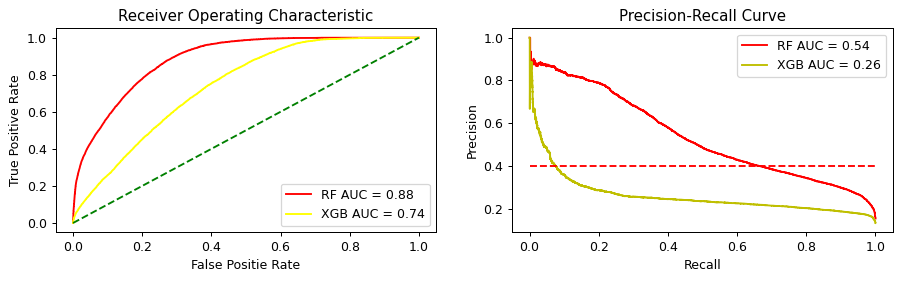

In [104]:

pos_pred_rf = model_rf_base.predict_proba(x_test)

pos_pred_xgb = model_xgb.predict_proba(x_test)
# keep probabilities for the positive outcome only
pos_pred_rf = pos_pred_rf[:,1]

pos_pred_xgb = pos_pred_xgb[:,1]
# calculate roc curve
fpr_rf, tpr_rf, threshold = roc_curve(y_test, pos_pred_rf)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, pos_pred_xgb)
# # calculate auc, equivalent to roc_auc_score()?
roc_auc_rf = auc(fpr_rf, tpr_rf)

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=90)
ax1.set_title('Receiver Operating Characteristic')
ax1.plot(fpr_rf, tpr_rf, 'r', label = 'RF AUC = %0.2f' % roc_auc_rf)

ax1.plot(fpr_xgb, tpr_xgb, color='yellow', label = 'XGB AUC = %0.2f' % roc_auc_xgb)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1], 'g--')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positie Rate')

precision_rf, recall_rf, threshold = precision_recall_curve(y_test, pos_pred_rf)

precision_xgb, recall_xgb, threshold = precision_recall_curve(y_test, pos_pred_xgb)
pr_auc_rf = auc(recall_rf, precision_rf)

pr_auc_xgb = auc(recall_xgb, precision_xgb)
ax2.set_title('Precision-Recall Curve')
ax2.plot(recall_rf, precision_rf, 'r', label = 'RF AUC = %0.2f' % pr_auc_rf)

ax2.plot(recall_xgb, precision_xgb, 'y', label = 'XGB AUC = %0.2f' % pr_auc_xgb)
ax2.legend(loc = 'upper right')
ax2.plot([0, 1], [0.4, 0.4], 'r--')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')
plt.show()

In [105]:
test

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## we had to understand data and its generation ,if the data leak , a lot of this things of data , and test and train how they are different

## a lot of things to learn , mrunal work from start , if you wan to andrenaline to push in , crwate a deadline and stick to it